In [107]:
import pandas as pd
import numpy as np

UPLOAD DATA

In [108]:
# REQ 1
tweets=pd.read_csv("train.csv")
tweets

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


DATA INFO

In [109]:
# REQ 2
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [110]:
tweets.duplicated().sum()

0

MISSING DATA

In [111]:
#REQ 3
tweets.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [112]:
tweets.isnull().sum()/len(tweets)

id          0.000000
keyword     0.008013
location    0.332720
text        0.000000
target      0.000000
dtype: float64

DATA IN EACH CLASS

In [113]:
#REQ 4
tweets.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

TOP 15 LOCATION

In [114]:
#REQ 5
tweets.location[:15]

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
Name: location, dtype: object

TOP 15 KEYWORDS

In [115]:
#REQ 6
tweets.keyword[:15]

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
Name: keyword, dtype: object

MOST COMMON WORDS AND STOPWORDS


In [116]:
# REQ 7 and 8
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=stopwords.words('english')
from nltk.stem import PorterStemmer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [117]:
def process_tweets(tweets):
    clean_tweets=[]
    stop_tweets=[]
    stemmer=PorterStemmer()

    for tweet in tweets:
        #clean tweet
        tweet=re.sub(r'(@|#)[a-zA-Z0-9_]+',"",tweet)# remove hash $ mention
        tweet=re.sub(r'https?:\/\/\S+',"",tweet) # remove hyperlink
        tweet=re.sub(r'\W'," ",tweet) # remove special chacters 
        tweet=re.sub(r'\s[0-9]+\s'," ",tweet) # remove numbers
        tweet=re.sub('^\s+',"",tweet) # remove spaces
        tweet=re.sub('\s+$',"",tweet) # remove spaces

        for word in tweet.split():
          if word.lower() not in stop_words:
            clean_tweet=[stemmer.stem(word.lower())]
            clean_tweets.append(clean_tweet)
          else:
            stop_tweet=[stemmer.stem(word.lower())]
            stop_tweets.append(stop_tweet)
  
    return clean_tweets,stop_tweets

In [118]:
clean_tweets,stop_tweets= process_tweets(tweets.text)
len(clean_tweets),len(stop_tweets)

(64614, 38585)

In [119]:
clean_tweets

[['deed'],
 ['reason'],
 ['may'],
 ['allah'],
 ['forgiv'],
 ['us'],
 ['forest'],
 ['fire'],
 ['near'],
 ['la'],
 ['rong'],
 ['sask'],
 ['canada'],
 ['resid'],
 ['ask'],
 ['shelter'],
 ['place'],
 ['notifi'],
 ['offic'],
 ['evacu'],
 ['shelter'],
 ['place'],
 ['order'],
 ['expect'],
 ['13'],
 ['peopl'],
 ['receiv'],
 ['evacu'],
 ['order'],
 ['california'],
 ['got'],
 ['sent'],
 ['photo'],
 ['rubi'],
 ['smoke'],
 ['pour'],
 ['school'],
 ['updat'],
 ['california'],
 ['hwi'],
 ['close'],
 ['direct'],
 ['due'],
 ['lake'],
 ['counti'],
 ['fire'],
 ['heavi'],
 ['rain'],
 ['caus'],
 ['flash'],
 ['flood'],
 ['street'],
 ['manit'],
 ['colorado'],
 ['spring'],
 ['area'],
 ['top'],
 ['hill'],
 ['see'],
 ['fire'],
 ['wood'],
 ['emerg'],
 ['evacu'],
 ['happen'],
 ['build'],
 ['across'],
 ['street'],
 ['afraid'],
 ['tornado'],
 ['come'],
 ['area'],
 ['three'],
 ['peopl'],
 ['die'],
 ['heat'],
 ['wave'],
 ['far'],
 ['haha'],
 ['south'],
 ['tampa'],
 ['get'],
 ['flood'],
 ['hah'],
 ['wait'],
 ['second'

In [120]:
def build_freq(tweets):
    freq={}

    for i in range(len(tweets)):

        for word in tweets[i]:
            key=word

            if key not in freq.keys():

                    freq[key]=1

            else:
                    freq[key]+=1
    return freq

In [121]:
freq=build_freq(clean_tweets)
max_word=max(freq,key=freq.get)
max_word,freq[max_word]

('like', 410)

In [122]:

freq=build_freq(stop_tweets)
max_word=max(freq,key=freq.get)
max_word,freq[max_word]

('the', 3275)

PREPARING DATASET

In [123]:
#REQ 9
def cleaning_tweets(tweets):
    clean_tweets=[]
    stemmer=PorterStemmer()

    for tweet in tweets:
        #clean tweet
        tweet=re.sub(r'(@|#)[a-zA-Z0-9_]+',"",tweet)# remove hash $ mention
        tweet=re.sub(r'https?:\/\/\S+',"",tweet) # remove hyperlink
        tweet=re.sub(r'\W'," ",tweet) # remove special chacters 
        tweet=re.sub(r'\s[0-9]+\s'," ",tweet) # remove numbers
        tweet=re.sub('^\s+',"",tweet) # remove spaces
        tweet=re.sub('\s+$',"",tweet) # remove spaces

        # remove stops words and stemming 
        clean_tweet=[stemmer.stem(word.lower()) for word in tweet.split() if word.lower() not in stop_words]

        clean_tweets.append(clean_tweet)

    return clean_tweets

In [124]:
clean_tweets=cleaning_tweets(tweets.text)
len(clean_tweets)

7613

In [125]:
from tensorflow.keras.preprocessing.text import Tokenizer
toknizer=Tokenizer()
toknizer.fit_on_texts(clean_tweets)
sequence=toknizer.texts_to_sequences(clean_tweets)

len_seq=[len(sent) for sent in sequence]
max(len_seq)

23

In [126]:
#Pading


In [127]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

padd_sequnces=pad_sequences(sequence,maxlen=30)


In [128]:
padd_sequnces

array([[   0,    0,    0, ..., 2362, 2822,   49],
       [   0,    0,    0, ..., 4888, 4889, 1183],
       [   0,    0,    0, ...,  384,  300,  422],
       ...,
       [   0,    0,    0, ..., 1333,  489, 1334],
       [   0,    0,    0, ...,   91,  911,   96],
       [   0,    0,    0, ...,  140,  652,   44]], dtype=int32)

In [129]:
len(padd_sequnces)

7613

TRAIN TEST SPLIT

In [130]:
#REQ 10
from sklearn.model_selection import train_test_split
import numpy as np 
train_X,test_X,train_y,test_y = train_test_split(padd_sequnces,np.array(tweets['target']),test_size=0.15)

TRAIN LSTM

In [131]:
#REQ 11
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Embedding,Dropout,SpatialDropout1D


model=Sequential()
model.add(Embedding(1000,500,input_length=padd_sequnces.shape[1]))
model.add(Dropout(0.7))
model.add(LSTM(100, dropout=0.5, return_sequences=True,recurrent_dropout=0.5))
model.add(Dropout(0.7))
model.add(LSTM(32, dropout=0.5, recurrent_dropout=0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer='adam' ,metrics = ['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 30, 500)           500000    
                                                                 
 dropout_4 (Dropout)         (None, 30, 500)           0         
                                                                 
 lstm_4 (LSTM)               (None, 30, 100)           240400    
                                                                 
 dropout_5 (Dropout)         (None, 30, 100)           0         
                                                                 
 lstm_5 (LSTM)               (None, 32)                17024     
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 757,457
Trainable params: 757,457
Non-tr

In [132]:
train_X


array([[   0,    0,    0, ...,  737, 1318,    8],
       [   0,    0,    0, ..., 1652, 2402,  451],
       [   0,    0,    0, ..., 1812,   71,  390],
       ...,
       [   0,    0,    0, ...,  183, 7118,    4],
       [   0,    0,    0, ..., 1099,  598,  646],
       [   0,    0,    0, ...,  321,  314, 1247]], dtype=int32)

In [133]:
train_y

array([1, 0, 1, ..., 1, 1, 1])

In [134]:
!pip install keras
import keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [135]:
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [136]:
history=model.fit(train_X,train_y,batch_size=32,epochs=10,callbacks=[es_callback],validation_split=0.1)

Epoch 1/10
182/182 [==============================] - 65s 312ms/step - loss: 0.6067 - accuracy: 0.6634 - val_loss: 0.5164 - val_accuracy: 0.7423
Epoch 2/10
182/182 [==============================] - 49s 270ms/step - loss: 0.4588 - accuracy: 0.7956 - val_loss: 0.5242 - val_accuracy: 0.7485
Epoch 3/10
182/182 [==============================] - 46s 252ms/step - loss: 0.4284 - accuracy: 0.8144 - val_loss: 0.5164 - val_accuracy: 0.7608
Epoch 4/10
182/182 [==============================] - 47s 256ms/step - loss: 0.4073 - accuracy: 0.8219 - val_loss: 0.5191 - val_accuracy: 0.7608
Epoch 5/10
182/182 [==============================] - 45s 249ms/step - loss: 0.3975 - accuracy: 0.8286 - val_loss: 0.5331 - val_accuracy: 0.7546
Epoch 6/10
182/182 [==============================] - 46s 254ms/step - loss: 0.3864 - accuracy: 0.8336 - val_loss: 0.5513 - val_accuracy: 0.7608


EVALUATE MODEL

In [137]:
#REQ 12
model.evaluate(test_X,test_y)
test=["Rape victim dies as she sets herself ablaze: A 16-year-old girl died of burn injuries as she set herself ablazeÂ‰Ã›_ http://t.co/UK8hNrbOob",
      "Awesome!",
      'If your nature appropriates it love will burn you until you become annihilated in your beloved...https://t.co/sMlwjunD0',
      'Bombing of Hiroshima 1945. http://t.co/4UHq9jKCvq']
test_process=cleaning_tweets(test)
sequence1=toknizer.texts_to_sequences(test_process)
padd_sequnce=pad_sequences(sequence1,maxlen=30)
model.predict(padd_sequnce).round()

36/36 [==============================] - 1s 20ms/step - loss: 0.5345 - accuracy: 0.7583


array([[1.],
       [0.],
       [0.],
       [1.]], dtype=float32)

Evaluate the results with charts of acc and loss

In [138]:
#Req 13
import matplotlib.pyplot as plt

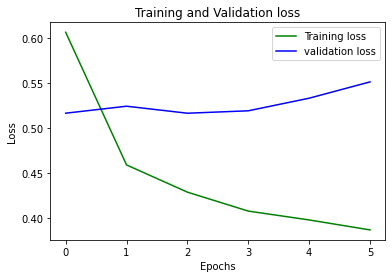

In [140]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,6)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

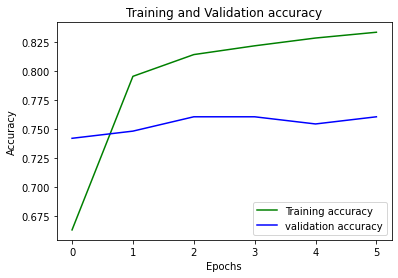

In [142]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,6)
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

SAVE MODEL

In [143]:
#REQ 14
model.save('project.F')#save model

INFO:tensorflow:Assets written to: project.F/assets


INFO:tensorflow:Assets written to: project.F/assets
